Execute `Run all Cells` under the `Cell` menu, first, to format the markdown cells!
(Remember to activate the nbextension `Hide Input` as described in the _Jupyter introduction_ exercise)

# Aim of exercise

Perform a forward pass and a backward pass on the two-neuron ffANN in the figure below to compute the gradient $\frac{\partial L(b,w|x)}{\partial w_1}$ and use this to compute and updated weight $w'_1$.

Don't worry! We will guide you through this, provide some template code and help fill in the values of the intermediate expression in a a Forward pass table and and Backward pass table, respectively. Feel free to look at the hidden `Solution`s and `Code help`s if it gets too hard.

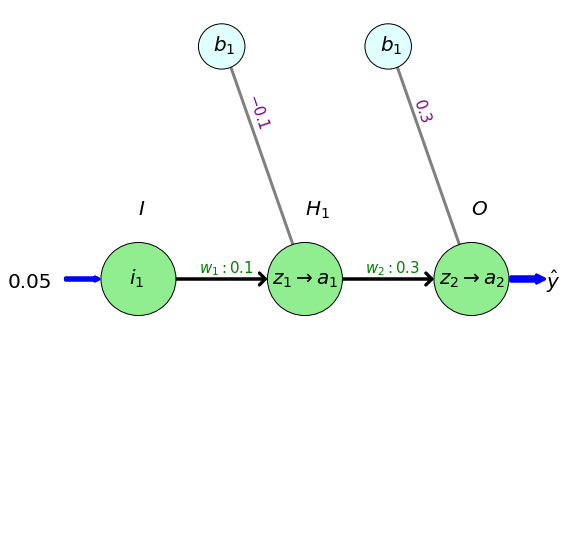

In [8]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join('..', 'common_assets')))
from draw_neural_net import draw_neural_net

def sigma(z):
  return 1/(1+np.exp(-z))

#-----1-1-1
layer_sizes = [1,1,1]

x= 0.05
y = 0.1
i1 = x
w1 = 0.1
w2=0.3
b1 = -0.10
b2 = 0.30
z1 = w1*i1+b1
a1 = sigma(z1)
z2 = w2*a1+b2
a2 = sigma(z2)
C = 0.5 * (y-a2)**2
# z1 = round(z1, 2)
# a1 = round(a1, 2)
# z2 = round(z2, 2)
# a2 = round(a2, 2)
# C = round(C,2)

eta = 0.3

dlda2 = a2-y
da2dz2= a2*(1-a2)
dcdz2 = dlda2 * da2dz2
dz2da1 = w2
dcda1 = dcdz2 * dz2da1
da1dz1 = a1*(1-a1)
dcdz1 = dcda1 * da1dz1
dz1dw1 = i1
dcdw1 = dcdz1 * dz1dw1

wnew = w1 - eta * dcdw1

weights = [
    np.array(
        [
            ["w_1:{}".format(w1)]
         ]
    ),
    np.array(
        [
            [ "w_2:{}".format(w2)]
        ]
    )
]
biases = [
    np.array(
        ["{}".format(b1)]
    ), 
    np.array(
        ["{}".format(b2)]
    )
]

hidden = [
                np.array(
                [ r"$i_1$"]
                ),
                np.array(
                [ r"$z_1\rightarrow a_1$"]
                ),
                np.array(
                [ r"$z_2\rightarrow a_2$"]
                ),
]

figExercise = plt.figure(figsize=(10, 10))
ax = figExercise.gca()
ignore=ax.axis('off')

draw_neural_net(ax, 
                layerSizes = layer_sizes, 
                weights = weights, 
                otherNodePrefix = hidden,
                biases=biases, 
                inputPrefix = ["{}".format(x)], 
                outputPrefix = "\hat{y}",
                nodeFontSize=20, edgeFontSize = 15, edgeWidth = 3
               )
#plt.show()

## Task 1. Forward pass

Let's start by performing the forward pass of the ANN.

We will start by creating variables to hold the values of the intermediate and final expressions

In [15]:
# Known variables
# Initialize variables to values in figure
x = 0.05
y = 0.01
w1 = 0.1
b1 = -0.1
w2 = 0.3
b2 = 0.3

# Unknown variables to be computed
i1 = ""
z1 = ""
a1 = ""
z2 = ""
a2 = ""
haty = ""
L = ""

Execute the table cell below to display table

In [16]:
import pandas as pd

# Some styling for the 
props1 = [
    ("font-size", "18px"),
    ('max-width', '2.5cm'),
    ('text-align', 'left')
#    ('padding', '2.5cm)')
#    ("font-size", "24px"),
#    ('max-width', '2cm'),
#    ('text-align', 'center'),
#    ('padding', '5cm)')
]
styles1 = [
    dict(selector="th", props=props1),
    dict(selector="td", props=props1),
]
colNames = { 
        "x" : r"$x$",
        "y" : r"$y$",
        "w1" : r"$w_1$",
        "b1" : r"$b_1$",
        "i1" : r"$i_1$", 
        "z1" : r"$z_1$", 
        "a1" : r"$a_1$",
        "w2" : r"$w_2$",
        "b2" : r"$b_2$",
        "z2" : r"$z_2$",
        "a2" : r"$a_2$",
        "haty" : r"$\hat{y}$",
        "L" : "$L(w,b|x)$"
}


# Code below is what is needed to update table at each step
tab = pd.Series(
    { 
        "x" : format(x, ".3g"), # Use this format to display nicely in table
        "y" : format(y, ".3g"),
        "w1" : format(w1, ".3g"), 
        "b1" : format(b1, ".3g"), 
        "i1" : "" if isinstance(i1, str) else format(i1, ".3g"), 
        "z1" : "" if isinstance(z1, str) else format(z1, ".3g"), 
        "a1" : "" if isinstance(a1, str) else format(a1, ".3g"), 
        "w2" : format(w2, ".3g"), 
        "b2" : format(b2, ".3g"),        
        "z2" : "" if isinstance(z2, str) else format(z2, ".3g"),
        "a2" : "" if isinstance(a2, str) else format(a2, ".3g"),
        "haty" : "" if isinstance(haty, str) else format(haty, ".3g"),
        "L" : "" if isinstance(L, str) else format(L, ".3g").center(12, '\u00A0')
    }
)
tab1=pd.DataFrame.rename(tab.to_frame().T, columns = colNames).style.hide_index().set_table_styles(styles1)
tab1

$x$,$y$,$w_1$,$b_1$,$i_1$,$z_1$,$a_1$,$w_2$,$b_2$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.01,0.1,-0.1,,,,0.3,0.3,,,,


### Path of intermediate expressions

First, notice that $i_1 = x$ and $\hat{y} = a_2$.

The path of intermediate expressions from $x$ to $L(b,w|x)$ is:

$\begin{eqnarray}
z_1 &=&  w_1 i_1 + b_1\\
a_1 &=& \sigma(z_1) = \frac{1}{1+e^{-z_1}}\\
z_2 &=&  w_2 a_{1} + b_2\\
a_2 &=& \sigma(z_2) = \frac{1}{1+e^{-z_2}}\\
L(w,b|x) &=& \frac{1}{2}\left(y-\hat{y}\right)^2 = \frac{1}{2}\left(y-a_2\right)^2
\end{eqnarray}$

- Try to update the corresponding variables in the code cell below and see if you get the same table values as below
    - example: `z1 = w1 * i1 +b1` (remember to set `i1` first)
    - *hint!*: to compute $\sigma(z)$, use, e.g.
    ```
    import tensorflow as tf
    tf.sigmoid(z).numpy()
    ``` 
    - As a last resort you can click the *Code help* below

In [17]:
# Replace "" with the code to compute these variables
import tensorflow as tf
i1 = ""
z1 = ""
a1 = ""
z2 = ""
a2 = ""
haty = ""
L = ""

Execute the table cell below to display table

In [18]:
# Code below is what is needed to update table at each step
tab = pd.Series(
    { 
        "x" : format(x, ".3g"), # Use this format to display nicely in table
        "y" : format(y, ".3g"),
        "w1" : format(w1, ".3g"), 
        "b1" : format(b1, ".3g"), 
        "i1" : "" if isinstance(i1, str) else format(i1, ".3g"), 
        "z1" : "" if isinstance(z1, str) else format(z1, ".3g"), 
        "a1" : "" if isinstance(a1, str) else format(a1, ".3g"), 
        "w2" : format(w2, ".3g"), 
        "b2" : format(b2, ".3g"),        
        "z2" : "" if isinstance(z2, str) else format(z2, ".3g"),
        "a2" : "" if isinstance(a2, str) else format(a2, ".3g"),
        "haty" : "" if isinstance(haty, str) else format(haty, ".3g"),
        "L" : "" if isinstance(L, str) else format(L, ".3g").center(12, '\u00A0')
    }
)
tab1=pd.DataFrame.rename(tab.to_frame().T, columns = colNames).style.hide_index().set_table_styles(styles1)
tab1

$x$,$y$,$w_1$,$b_1$,$i_1$,$z_1$,$a_1$,$w_2$,$b_2$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.01,0.1,-0.1,,,,0.3,0.3,,,,


## Example: Backward pass to compute $\frac{\partial L(w,b|x)}{\partial w_2}$

### 1. Identify relevant path (from forward path)

Here, we focus on the path from $w_2$ to $L(w,b|x)$, i.e., the second neuron 

$\begin{eqnarray}
z_2 &=&  w_2 a_{1} + b_2\\
a_2 &=& \sigma(z_2) = \frac{1}{1+e^{-z_2}}\\
L(w,b|x) &=& \frac{1}{2}\left(y-\hat{y}\right)^2 = \frac{1}{2}\left(y-a_2\right)^2
\end{eqnarray}$

### 2. Apply chain rule

We use the chain rule to split $\frac{\partial L(w,b|x)}{\partial w_2}$ on $a_2$ and $z_2$, in turn, and do it  backwards along the path, i.e., from right to left in the figure above.

#### First split on $a_2$:

$\hspace{1cm}\begin{eqnarray} 
\frac{\partial L(w,b|x)}{\partial w_2} &=&  \frac{\partial a_2}{\partial w_2}\times \frac{\partial L(w,b|x)}{\partial a_2} 
\end{eqnarray}$

#### Then split first factor on $z_2$:

$\hspace{1cm}\begin{eqnarray} 
\frac{\partial L(w,b|x)}{\partial w_2} &=&  \frac{\partial z_2}{\partial w_2}\times \frac{\partial a_2}{\partial z_2} \times \frac{\partial L(w,b|x)}{\partial a_2} 
\end{eqnarray}$

### 3. Compute individual partial derivatives

The resulting partial derivatives are easier to compute. In fact you know how to compute some of them already:

- $\begin{eqnarray}
\frac{\partial L(w,b|x)}{\partial a_2} 
&=&  \frac{\partial \frac{1}{2}(y-a_2)^2}{\partial a_2}
\end{eqnarray}$  
This is a derivative we just learnt above (with $x$ substituted for $a_1$ and $b$ for $y$),  
$\begin{eqnarray}
\frac{\partial L(w,b|x)}{\partial a_2} 
&=&  a_2-y
\end{eqnarray}$  
Now, we just need to fill in the values of $y$ and $a_2$ from our Forward pass table  
$\begin{eqnarray}\frac{\partial L(w,b|x)}{\partial a_2} 
&=&  0.61 - 0.1 = 0.51
\end{eqnarray}$  
<br>
 
- $\begin{eqnarray}
\frac{\partial a_2}{\partial z_2} 
&=&  \frac{\partial \sigma(z_2)}{\partial z_2}\\
\end{eqnarray}$  
Again, a derivative we learned above (with $x$ substituted for $z_2$).  
$\begin{eqnarray}
\frac{\partial a_2}{\partial z_2} 
&=&  \sigma(z_2)\left(1-\sigma(z_2)\right) = a_2(1-a_2)\\
\end{eqnarray}$
Filling in the values of $a_2$ from our Forward pass table, gives  
$\begin{eqnarray}
\frac{\partial a_2}{\partial z_2} 
&=&  0.61\times(1-0.61) = 0.2379
\end{eqnarray}$  
<br>


- $\begin{eqnarray}
\frac{\partial z_2}{\partial w_2} &=&  \frac{\partial w_2 a_1+b_2}{\partial w_2} \\
\end{eqnarray}$  
which is a is a derivative of a sum that can be solved with the standard derivative rules above,  
$\begin{eqnarray}
\frac{\partial z_2}{\partial w_2} &=&  a_1 \\
\end{eqnarray}$ 
Filling in the values of and $a_1$ from our Forward pass table, gives us  
$\begin{eqnarray}
\frac{\partial z_2}{\partial w_2} &=&  0.48 \\
\end{eqnarray}$ 



### 4. Compute the requested (full) partial derivative

Finally, we get the value of $\frac{\partial L(w,b|x)}{\partial w_1}$ by simply multiplying the three partial derivatives.

$\hspace{1cm}\begin{eqnarray} 
\frac{\partial L(w,b|x)}{\partial w_2} &=&  \frac{\partial z_2}{\partial w_2}\times \frac{\partial a_2}{\partial z_2} \times \frac{\partial L(w,b|x)}{\partial a_2}\\
&=& 0.48 \times 0.2379 \times 0.51 = 0.3958
\end{eqnarray}$



### 5. Compute the updated weight $w'_2$

Recall that an updated weight $w'$ is computed as

$$w' = w - \eta \frac{\partial L(w,b|x)}{\partial w_2}$$

Let's use an $\eta = 0.05$

$\hspace{1cm}\begin{eqnarray} 
w'_2 &=& w_1 - \eta \times \frac{\partial L(w,b|x)}{\partial w_2} 
&=& 0.1 - 0.05\times 0.3958 
\end{eqnarray}$

### Program it!
Let's perform the computation of the variables above as python variable and summarize these variables in a table. We use this simple scheme for naming the variables:

`dLda2` = $\frac{\partial L(b,w|x)}{\partial a_2}$

`da2dz2` = $\frac{\partial a_2}{\partial z_2}$

etc.

The variables will then be:

In [22]:
import tensorflow as tf
i1 = x
z1 = w1 * i1 +b1
a1 = tf.sigmoid(z1).numpy()
z2 = w2 * a1 + b2
a2 = tf.sigmoid(z2).numpy()
haty=a2
L = (y-haty)/2

In [27]:
dLda2 = a2 - y
da2dz2 = a2 * (1-a2)
dz2dw2 = a2
dLdw2 = dLda2 * da2dz2 * dz2dw2
eta = 0.05
w2new = w2 - dLdw2 * eta

In [28]:
colNames = { 
    "dLda2" : r"$\frac{\partial L(b,w|x)}{\partial a_2}$",
    "da2dz2" : r"$\frac{\partial a_2}{\partial z_2}$",
    "dz2dw2" : r"$\frac{\partial z_2}{\partial w_2}$",
    "dLdw2" : r"$\frac{\partial L(b,w|a)}{\partial w_2}$",
    "eta": r"$\eta$",
    "w2new": r"$w'_2$"
}


# Code below is what is needed to update table at each step
tab = pd.Series(
    { 
        "dLda2" : format(dLda2, ".3g").center(12, '\u00A0'), # Use this format to display nicely in table
        "da2dz2" : format(da2dz2, ".3g"),
        "dz2dw2" : format(dz2dw2, ".3g"), 
        "eta" : format(eta, ".3g"), 
        "w2new" : format(w2new, ".3g")
    }
)
tab2=pd.DataFrame.rename(tab.to_frame().T, columns = colNames).style.hide_index().set_table_styles(styles1)
tab2

"$\frac{\partial L(b,w|x)}{\partial a_2}$",$\frac{\partial a_2}{\partial z_2}$,$\frac{\partial z_2}{\partial w_2}$,$\eta$,$w'_2$
0.599,0.238,0.609,0.05,0.296


### What about the other layers?

To compute, e.g., $\frac{\partial L(w,b|x)}{\partial w_1}$, we will need to apply the chain rule to split on to $a_2$, $a_z$, $a_1$, $z_1$, etc...

... in fact, that's what you will do now!

## Task 2. Backward pass

Perform a backward pass to update the value of $w_1$, that is, use the chain rule to split $\frac{\partial L(b,w|x)}{\partial w_1}$, create variables for the intermediate expressions and compute their values, values compute the value of $\frac{\partial L(b,w|x)}{\partial w_1}$, and compute $w'_2$ (i.e., the updated value of $w_2$)

Let's first print out the ANN and the table with values from the forward pass again, just to have them handy 

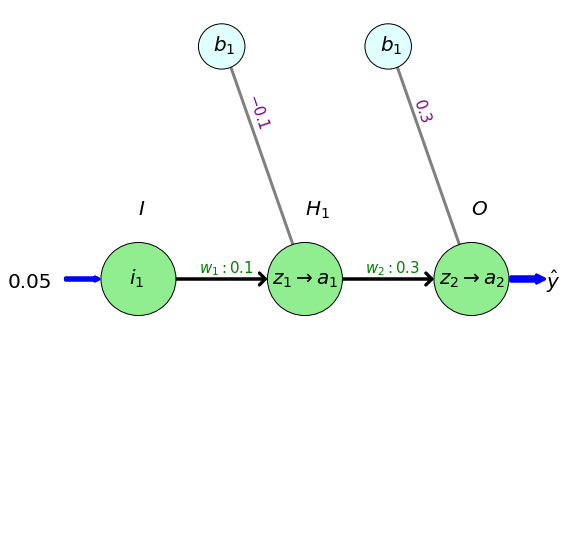

In [12]:
figExercise

In [13]:
tab1

$x$,$y$,$w_1$,$b_1$,$i_1$,$z_1$,$a_1$,$w_2$,$b_2$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.01,0.1,-0.1,0.05,-0.095,0.48,0.3,0.3,0.44,0.61,0.61,-0.3


### 1. The relevant path

The path from $w_1$ to $L(w,b|x)$ is

$\begin{eqnarray}
z_1 &=&  w_1 i_1 + b_1\\
a_1 &=& \sigma(z_1) = \frac{1}{1+e^{-z_1}}\\
z_2 &=&  w_2 a_{1} + b_2\\
a_2 &=& \sigma(z_2) = \frac{1}{1+e^{-z_2}}\\
L(w,b|x) &=& \frac{1}{2}\left(y-\hat{y}\right)^2 = \frac{1}{2}\left(y-a_2\right)^2
\end{eqnarray}$

### 2. Apply the chain  rule

Appying the chain rule on $a$'s and $z$'s of the layers backwards (from right to left in the figure) gives (green color indicates which expression to split in the next row):

<!--
$\hspace{1cm}\begin{eqnarray} 
\frac{\partial L(w,b|x)}{\partial w_1} &=&  \frac{\partial a_2}{\partial w_1}\times \frac{\partial L(w,b|x)}{\partial a_2} 
\end{eqnarray}$

$\hspace{1cm}\begin{eqnarray} 
\frac{\partial a_2}{\partial w_1} &=&  \frac{\partial z_2}{\partial w_1}\times \frac{\partial a_2}{\partial z_2} 
\end{eqnarray}$

$\hspace{1cm}\begin{eqnarray} 
\frac{\partial z_2}{\partial w_1} &=&  \frac{\partial a_1}{\partial w_1}\times \frac{\partial z_2}{\partial a_1} 
\end{eqnarray}$

$\hspace{1cm}\begin{eqnarray} 
\frac{\partial a_1}{\partial w_1} &=&  \frac{\partial z_1}{\partial w_1}\times \frac{\partial a_1}{\partial z_1} 
\end{eqnarray}$

$\hspace{1cm}\begin{eqnarray} 
\frac{\partial z_1}{\partial w_1x} &=&  \frac{\partial w_1 \times i_1 + b_1}{\partial w_1}
\end{eqnarray}$
-->


$\hspace{1cm}\begin{eqnarray} 
\frac{\partial L(w,b|x)}{\partial w_1} 
&=&  
\color{green}{\frac{\partial a_2}{\partial w_1}} 
\times \frac{\partial L(w,b|x)}{\partial a_2} \\
%\frac{\partial L(w,b|x)}{\partial w_1} 
&=&  
\color{green}{\frac{\partial z_2}{\partial w_1}}
\times \frac{\partial a_2}{\partial z_2} 
\times \frac{\partial L(w,b|x)}{\partial a_2} \\
%\frac{\partial L(w,b|x)}{\partial w_1} 
&=&  
\color{green}{\frac{\partial a_1}{\partial w_1}}
\times \frac{\partial z_2}{\partial a_1}
\times \frac{\partial a_2}{\partial z_2} 
\times \frac{\partial L(w,b|x)}{\partial a_2} \\
%\frac{\partial L(w,b|x)}{\partial w_1} 
&=&  
\color{green}{\frac{\partial z_1}{\partial w_1}}
\times \frac{\partial a_1}{\partial z_1} 
\times \frac{\partial z_2}{\partial a_1}
\times \frac{\partial a_2}{\partial z_2} 
\times \frac{\partial L(w,b|x)}{\partial a_2} 
\end{eqnarray}$

We see that we have already computed the last of these partial derivatives, namely $\frac{\partial a_2}{\partial z_2}$ and $\frac{\partial L(w,b|x)}{\partial a_2}$. This is a very nice feature of back-propagation:  
$\quad$_If we have computed the values of partial derivatives for a layer, we can **reuse** these expressions in the preceeding layer._

(In computer science terms, back propagation is a _dynamic programming_ algorithm, that is, it is works in an iterative fashion, tabulates the values from one iteration (=layer), and reuses them in the next iteration in the algorithm (i.e., the previous layer, since we go backwards).)

Let's set up python variables for these intermediate expressions (reuse the ones already computed!):

In [29]:
# Unknown variables to compute in Back-propagation

#dLda2 = "" # Already computed, reuse
#da2dz2 = "" # Already computed, reuse!
dz2da1 = ""
da1dz1 = ""
dz1dw1 = ""
dLdw1 = ""
#eta = "" # Already computed, reuse
w1new = ""


And a table with these values (execute the table cell to update the table!)

In [30]:
props2 = [
    ("font-size", "18px"),
    ('max-width', '3cm'),
    ('text-align', 'center')
]
styles2 = [
    dict(selector="th", props = props2),
    dict(selector="td", props=props2)
]

colNames = { 
    "w1new" : r"$w'_1$",
    "eta" : r"$\eta$",
    "dLdw1" : r"$\frac{\partial L(w,b|x)}{\partial w_1}$",
    "dz1dw1" : r"$\frac{\partial z_1}{\partial w_1}$",
    "da1dz1" : r"$\frac{\partial a_1}{\partial z_1}$",
    "dz2da1" : r"$\frac{\partial z_2}{\partial a_1}$",
    "da2dz2" : r"$\frac{\partial a_2}{\partial z_2}$",
    "dLda2" : r"$\frac{\partial L(w,b|x)}{\partial a_2}$"
}

# Code below is what is needed to update table at each step
tab3 = pd.Series(
    { 
        "w1new" : "" if isinstance(w1new, str) else format(w1new, ".3g"),
        "eta" : "" if isinstance(eta, str) else format(eta, ".3g"),
        "dLdw1" : "" if isinstance(dLdw1, str) else format(dLdw1, ".3g"), 
        "dz1dw1" : "" if isinstance(dz1dw1, str) else format(dz1dw1, ".3g"),
        "da1dz1" : "" if isinstance(da1dz1, str) else format(da1dz1, ".3g"), 
        "dz2da1" : "" if isinstance(dz2da1, str) else format(dz2da1, ".3g"),
        "da2dz2" : "" if isinstance(da2dz2, str) else format(da2dz2, ".3g"),
        "dLda2" : "" if isinstance(dlda2, str) else format(dlda2, ".3g").center(12, '\u00A0')
    }
)



tab3 = pd.DataFrame.rename(tab3.to_frame().T, columns = colNames).style.hide_index().set_table_styles(styles1)
tab3


$w'_1$,$\eta$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,$\frac{\partial a_1}{\partial z_1}$,$\frac{\partial z_2}{\partial a_1}$,$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,0.05,,,,,0.238,0.509


### 3. Solve partial derivatives 1

$\begin{eqnarray}
\frac{\partial z_2}{\partial a_1} 
&=&  \frac{\partial w_2 a_1 +b_1}{\partial a_1} \\
&=& ?
\end{eqnarray}$

***
<details>
    <summary> Solution </summary>
$\begin{eqnarray}
\frac{\partial z_2}{\partial a_1} 
&=&  \frac{\partial w_2 a_1 +b_1}{\partial a_1} \\
&=& w_2
\end{eqnarray}$
</details>

***

- Then fill in the corresponding code below and see if you get the same table values

In [31]:
# Replace "" with the code to compute this variable
dz2da1 = ""

And a table with these values (execute the table cell to update the table!)

In [32]:
# Code below is what is needed to update table at each step
tab3 = pd.Series(
    { 
        "w1new" : "" if isinstance(w1new, str) else format(w1new, ".3g"),
        "eta" : "" if isinstance(eta, str) else format(eta, ".3g"),
        "dLdw1" : "" if isinstance(dLdw1, str) else format(dLdw1, ".3g"), 
        "dz1dw1" : "" if isinstance(dz1dw1, str) else format(dz1dw1, ".3g"),
        "da1dz1" : "" if isinstance(da1dz1, str) else format(da1dz1, ".3g"), 
        "dz2da1" : "" if isinstance(dz2da1, str) else format(dz2da1, ".3g"),
        "da2dz2" : "" if isinstance(da2dz2, str) else format(da2dz2, ".3g"),
        "dLda2" : "" if isinstance(dlda2, str) else format(dlda2, ".3g").center(12, '\u00A0')
    }
)



tab3 = pd.DataFrame.rename(tab3.to_frame().T, columns = colNames).style.hide_index().set_table_styles(styles1)
tab3



$w'_1$,$\eta$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,$\frac{\partial a_1}{\partial z_1}$,$\frac{\partial z_2}{\partial a_1}$,$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,0.05,,,,,0.238,0.509


### 3. Solve partial derivatives 2
$\begin{eqnarray}
\frac{\partial a_1}{\partial z_2} 
&=&  \frac{\partial \sigma(z_2)}{\partial z_2} \\
&=& \sigma(z_2)\left(1-\sigma(z_2)\right)\\
&=& a_1\left(1-a_1\right)
\end{eqnarray}$

***
<details>
    <summary> Solution </summary>
$\begin{eqnarray}
\frac{\partial a_1}{\partial z_2} 
&=&  \frac{\partial \sigma(z_2)}{\partial z_2} \\
&=& \sigma(z_2)\left(1-\sigma(z_2)\right)\\
&=& a_1\left(1-a_1\right)
\end{eqnarray}$

</details>

***

- Then fill in the corresponding code below and see if you get the same table values

In [23]:
# Replace "" with the code to compute this variable

da1dz1 = ""

And a table with these values (execute the table cell to update the table!)

In [33]:
# Code below is what is needed to update table at each step
tab3 = pd.Series(
    { 
        "w1new" : "" if isinstance(w1new, str) else format(w1new, ".3g"),
        "eta" : "" if isinstance(eta, str) else format(eta, ".3g"),
        "dLdw1" : "" if isinstance(dLdw1, str) else format(dLdw1, ".3g"), 
        "dz1dw1" : "" if isinstance(dz1dw1, str) else format(dz1dw1, ".3g"),
        "da1dz1" : "" if isinstance(da1dz1, str) else format(da1dz1, ".3g"), 
        "dz2da1" : "" if isinstance(dz2da1, str) else format(dz2da1, ".3g"),
        "da2dz2" : "" if isinstance(da2dz2, str) else format(da2dz2, ".3g"),
        "dLda2" : "" if isinstance(dlda2, str) else format(dlda2, ".3g").center(12, '\u00A0')
    }
)



tab3 = pd.DataFrame.rename(tab3.to_frame().T, columns = colNames).style.hide_index().set_table_styles(styles1)
tab3



$w'_1$,$\eta$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,$\frac{\partial a_1}{\partial z_1}$,$\frac{\partial z_2}{\partial a_1}$,$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,0.05,,,,,0.238,0.509


### 3. Solve partial derivatives  3
$\begin{eqnarray}
\frac{\partial z_1}{\partial w_1} 
&=&  \frac{\partial w_1 i_1 + b_1}{\partial w_1}\\
&=& ?
\end{eqnarray}$

***
<details>
    <summary> Solution </summary>
$\begin{eqnarray}
\frac{\partial z_1}{\partial w_1} 
&=&  \frac{\partial w_1 i_1 + b_1}{\partial w_1}\\
&=& i_1
\end{eqnarray}$


</details>

***

- Then fill in the corresponding code below and see if you get the same table values

In [25]:
# Replace "" with the code to compute this variable

dz1dw1 = ""

And a table with these values (execute the table cell to update the table!)

In [34]:
# Code below is what is needed to update table at each step
tab3 = pd.Series(
    { 
        "w1new" : "" if isinstance(w1new, str) else format(w1new, ".3g"),
        "eta" : "" if isinstance(eta, str) else format(eta, ".3g"),
        "dLdw1" : "" if isinstance(dLdw1, str) else format(dLdw1, ".3g"), 
        "dz1dw1" : "" if isinstance(dz1dw1, str) else format(dz1dw1, ".3g"),
        "da1dz1" : "" if isinstance(da1dz1, str) else format(da1dz1, ".3g"), 
        "dz2da1" : "" if isinstance(dz2da1, str) else format(dz2da1, ".3g"),
        "da2dz2" : "" if isinstance(da2dz2, str) else format(da2dz2, ".3g"),
        "dLda2" : "" if isinstance(dlda2, str) else format(dlda2, ".3g").center(12, '\u00A0')
    }
)



tab3 = pd.DataFrame.rename(tab3.to_frame().T, columns = colNames).style.hide_index().set_table_styles(styles1)
tab3



$w'_1$,$\eta$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,$\frac{\partial a_1}{\partial z_1}$,$\frac{\partial z_2}{\partial a_1}$,$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,0.05,,,,,0.238,0.509


### 4. Compute the requested (full) partial derivative

$\begin{eqnarray}
\frac{\partial L(b,w|x)}{\partial w_1} 
&=&  
\frac{\partial z_1}{\partial w_1} 
\times
\frac{\partial a_1}{\partial z_1} 
\times
\frac{\partial z_2}{\partial a_1} 
\times
\frac{\partial a_2}{\partial z_2} 
\times
\frac{\partial L(b,w|x)}{\partial a_2} 
\end{eqnarray}$

- And fill in the corresponding code below and see if you get the same table values

In [27]:
# Replace "" with the code to compute this variable
dLdw1 = ""

And a table with these values (execute the table cell to update the table!)

In [35]:
# Code below is what is needed to update table at each step
tab3 = pd.Series(
    { 
        "w1new" : "" if isinstance(w1new, str) else format(w1new, ".3g"),
        "eta" : "" if isinstance(eta, str) else format(eta, ".3g"),
        "dLdw1" : "" if isinstance(dLdw1, str) else format(dLdw1, ".3g"), 
        "dz1dw1" : "" if isinstance(dz1dw1, str) else format(dz1dw1, ".3g"),
        "da1dz1" : "" if isinstance(da1dz1, str) else format(da1dz1, ".3g"), 
        "dz2da1" : "" if isinstance(dz2da1, str) else format(dz2da1, ".3g"),
        "da2dz2" : "" if isinstance(da2dz2, str) else format(da2dz2, ".3g"),
        "dLda2" : "" if isinstance(dlda2, str) else format(dlda2, ".3g").center(12, '\u00A0')
    }
)



tab3 = pd.DataFrame.rename(tab3.to_frame().T, columns = colNames).style.hide_index().set_table_styles(styles1)
tab3

$w'_1$,$\eta$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,$\frac{\partial a_1}{\partial z_1}$,$\frac{\partial z_2}{\partial a_1}$,$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,0.05,,,,,0.238,0.509


### 5. Update $w_1$

$\begin{eqnarray}
w'_1
&=&  w_1 - \eta \frac{\partial L(b,wx)}{\partial w_1}
\end{eqnarray}$

- And fill in the corresponding code below and see if you get the same table values

In [29]:
# Replace "" with the code to compute this variable

w1new = ""

And a table with these values (execute the table cell to update the table!)

In [30]:
# Code below is what is needed to update table at each step
tab3 = pd.Series(
    { 
        "w1new" : "" if isinstance(w1new, str) else format(w1new, ".3g"),
        "eta" : "" if isinstance(eta, str) else format(eta, ".3g"),
        "dLdw1" : "" if isinstance(dLdw1, str) else format(dLdw1, ".3g"), 
        "dz1dw1" : "" if isinstance(dz1dw1, str) else format(dz1dw1, ".3g"),
        "da1dz1" : "" if isinstance(da1dz1, str) else format(da1dz1, ".3g"), 
        "dz2da1" : "" if isinstance(dz2da1, str) else format(dz2da1, ".3g"),
        "da2dz2" : "" if isinstance(da2dz2, str) else format(da2dz2, ".3g"),
        "dLda2" : "" if isinstance(dlda2, str) else format(dlda2, ".3g").center(12, '\u00A0')
    }
)



tab3 = pd.DataFrame.rename(tab3.to_frame().T, columns = colNames).style.hide_index().set_table_styles(styles1)
tab3

$w'_1$,$\eta$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,$\frac{\partial a_1}{\partial z_1}$,$\frac{\partial z_2}{\partial a_1}$,$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,0.3,,,,,0.24,0.51


# What about the bias?

The biases $b_1$ and b_2$ are udpated in very much the same way as the weights:

1. Determine the (forward) path from the bias in question, $b_i$, to the loss function $L(b,w|x)$. For $b_2$ this is: 
$$\begin{eqnarray}
z_2 &=&  w_2 a_{1} + b_2\\
a_2 &=& \sigma(z_2) = \frac{1}{1+e^{-z_2}}\\
L(w,b|x) &=& \frac{1}{2}\left(y-\hat{y}\right)^2 = \frac{1}{2}\left(y-a_2\right)^2
\end{eqnarray}$$  
(What would it be for $b_1$?)
2. Use the chain rule to split the requested partial derivative $\frac{\partial L(b,w|x)}{\partial b_i}$ on the $a_i$s and $z_i$s along this path.
3. Solve ther partial derivatives of the split expression and compute their values
4. Compute the value of $\frac{\partial L(b,w|x)}{\partial b_i}$ using the partial derivatives of the split expression
5. Update the requested bias $b_i$ using $\eta$ and $\frac{\partial L(b,w|x)}{\partial b_i}$.

(_If and only if_ you get time over, you could try to do this for $b2$ and/or $b_1$)

# What happens if we have more neurons per layer?

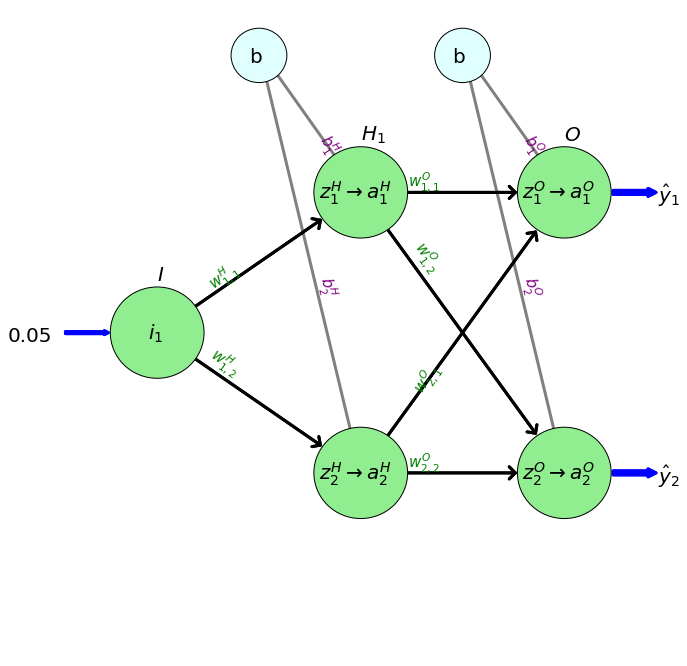

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from draw_neural_net import draw_neural_net

#-----1-2-2
layer_sizes = [1,2,2]

weights = [
    np.array(
        [
            [ "w_{1,1}^H", "w_{1,2}^H" ]
        ]
    ),
    np.array(
        [
            [ "w_{1,1}^O", "w_{1,2}^O" ], 
            [ "w_{2,1}^O", "w_{2,2}^O" ]
        ]
    )
]
biases = [
    np.array(
        [ "b_1^H", "b_2^H"]
    ), 
    np.array(
        [ "b_1^O", "b_2^O"]
    )
]

hidden = [
                np.array(
                [ r"$i_1$"]
                ),
                np.array(
                    [
                        r"$z_1^H\rightarrow a_1^H$",
                        r"$z_2^H\rightarrow a_2^H$"
                    ]
                ),
                np.array(
                    [
                        r"$z_1^O\rightarrow a_1^O$",
                        r"$z_2^O\rightarrow a_2^O$"
                    ]
                ),
]

figExercise2 = plt.figure(figsize=(12, 12))
ax = figExercise2.gca()
ax.axis('off')

draw_neural_net(ax, 
                layerSizes = layer_sizes, 
                weights = weights,
                otherNodePrefix = hidden,
                biasNodePrefix = "b",
                biases=biases, 
                inputPrefix = ["{}".format(x)], 
                nodeFontSize=20, edgeFontSize = 15, edgeWidth = 3
               )
#plt.show()

Well, we would still use the same general approach, but we get more paths to keep track of.

## Forward pass

Because there are now two paths to go from $i_1$ to $\hat{y}_1$ (and similarly from $i_1$ to $\hat{y}_2$), we need to sum over these ways in the forward pass. This is done when computing $z_1^O$, e.g.:

$\begin{eqnarray}
\hat{y}_1 &=& a_1^O = \sigma(z_1^O)\\
z_1^O &=& \left(\sum_{j=1}^2 w_{j,1}^O a_j^H\right) + b_1^O\\
etc.
\end{eqnarray}$

## Backward pass

Similarly, there are now two paths to consider when computing $\frac{\partial L(b,w|w)}{\partial w_1^H}$, one through $\hat{y}_1$ and one  trough $\hat{y}_2$ (see the ANN figure), and again we need to sum over these. Here it is done at the when splitting $\frac{\partial L(b,w|x)}{\partial w_1^H}$ at $a_1^H$, e.g.;

$\begin{eqnarray}
\frac{\partial L(b,w|x)}{\partial w_{1,1}^H} &=&
\frac{\partial z_1^H}{\partial w_{1,1}^H} 
\times
\frac{\partial a_1^H}{\partial z_1^H} 
\times
\sum_{j=1}^2
\frac{\partial z_j^O}{\partial a_1^H} 
\times
\frac{\partial a_j^O}{\partial z_j^O} 
\times
\frac{\partial L(b,w|x)}{\partial a_j^H} 
\end{eqnarray}$



## Matrix algebra

In fact it turns out that it is beneficial to collect similar variables into vectors and matrices, i.e., gradients, and then use matrix multiplication between these to compute all partial derivatives inone go. 

However, this would **extra-curricular for this course**, (but a walk-through is provided at the end of the exercise (only in _html_ version) as a challenge only for those who _really loves math_ and _if and only if_ they have time (NB! this will require familiarity with matrix algebra).

## So what does Tensorflow do?

Well, it uses matrix multiplication, but adds an additional twist:

While it works with gradients, it does this for all training samples at once, so that each gradient for all samples are collected in a multi-dimensional matrix ort a tensor (tensors $\approx$ "matrices of any dimension"). It then uses matrix multiplication on these tensors and perform gradient descent for all samples at the same time.

### "Tensors flows through the network!"



# Summary -- Back-propagation

## Efficient computation of partial derivatives $\frac{\partial L(w,b|x)}{\partial v}, v\in w\cup b$

+ Chain rule allows computing partial derivatives layer-wise, backwards
+ By collecting gradients and weights for layers in *tensors* over all training data, all computations in one epoch can be computed at the same time for all training data